# Final Project 4

# Overview

**Oleh: <br>
Yona Ade Hermawan<br>
PYTN_KS009_008**

### Latar Belakang

Keberadaan kartu kredit sudah dikenal sejak lama, namun model transaksi keuangan saat ini membuat kartu kredit jauh lebih bermanfaat dan nyaman. Tapi apa sebenarnya kartu kredit itu? Sederhananya, kartu kredit adalah alat pembayaran berupa kartu yang biaya pembayarannya dibayarkan di muka kepada penerbit kartu dalam suatu transaksi keuangan. Kemudian, pemegang kartu kredit harus membayar utang pembayaran kartu dalam jangka waktu yang telah disepakati sebelumnya. Kartu kredit berbeda dengan kartu debit konsumen, sehingga kartu kredit dapat menawarkan manfaat unik bagi orang yang menggunakannya. Namun, kartu kredit tidak berbeda dengan kartu bank dalam banyak hal, satu-satunya perbedaan adalah modal yang digunakan. Saldo kartu kredit adalah saldo tunggakan yang dibatasi pada jumlah tertentu.

Pemegang kartu kredit membayar biaya tertentu untuk menggunakan kartu kredit tersebut. Pengguna kartu kredit membayar iuran tahunan sesuai ketentuan yang ditawarkan pihak bank. Dalam banyak kasus, iuran tahunan untuk tahun pertama dibebaskan karena manfaat tambahan bagi pengguna kartu kredit. Selain itu, bunga default dan bunga akan dibayarkan. Jika pemegang kartu menunggak pembayaran tagihan, maka akan dikenakan biaya keterlambatan. Bunga timbul selama periode ini jika pelanggan menggunakan kartu untuk kredit atau cicilan. Jika pelanggan melebihi batas kartu kredit, pelanggan juga akan dikenakan biaya.

Selain biaya tersebut, beberapa layanan kartu kredit memiliki biaya tambahan, seperti Biaya B. Tunai dan Informasi Pembayaran. Saat Anda menggunakan kartu kredit untuk menarik uang, biasanya ada biaya tarik tunai. Sedangkan jika pelanggan membutuhkan informasi pembayaran yang detail dan lengkap, maka akan dikenakan biaya informasi. Jika memungkinkan, pilihlah kartu kredit tanpa biaya bulanan agar lebih mudah.

### Data

Dataset yang digunakan yaitu Credit Card Data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut, antara lain:

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

### Objective
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from pylab import bone, pcolor, colorbar, plot, show
# K-Means Clusterinng
from sklearn.cluster import KMeans
# DBScan Clustering
from sklearn.cluster import DBSCAN
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
# Visualization Hierarchy diagram
import scipy.cluster.hierarchy as shc
#DBSCAN
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv("dataset/CC GENERAL.csv")
pd.set_option("display.max_columns", None)

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Data Cleaning

In [7]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [8]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [9]:
df['CREDIT_LIMIT'].value_counts()

3000.000000     784
1500.000000     722
1200.000000     621
1000.000000     614
2500.000000     612
               ... 
9200.000000       1
13550.000000      1
7227.272727       1
11250.000000      1
1833.333333       1
Name: CREDIT_LIMIT, Length: 205, dtype: int64

In [10]:
# memberikan nilai 0 dengan asumsi data null adalah data user yang tidak mendapatkan limit kredit karena tidak ada pembayaran
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']= df['CREDIT_LIMIT'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=0

In [11]:
#Mengecek missing value
df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Data Exploration

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,991.163641,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2424.140513,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,931.596638,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


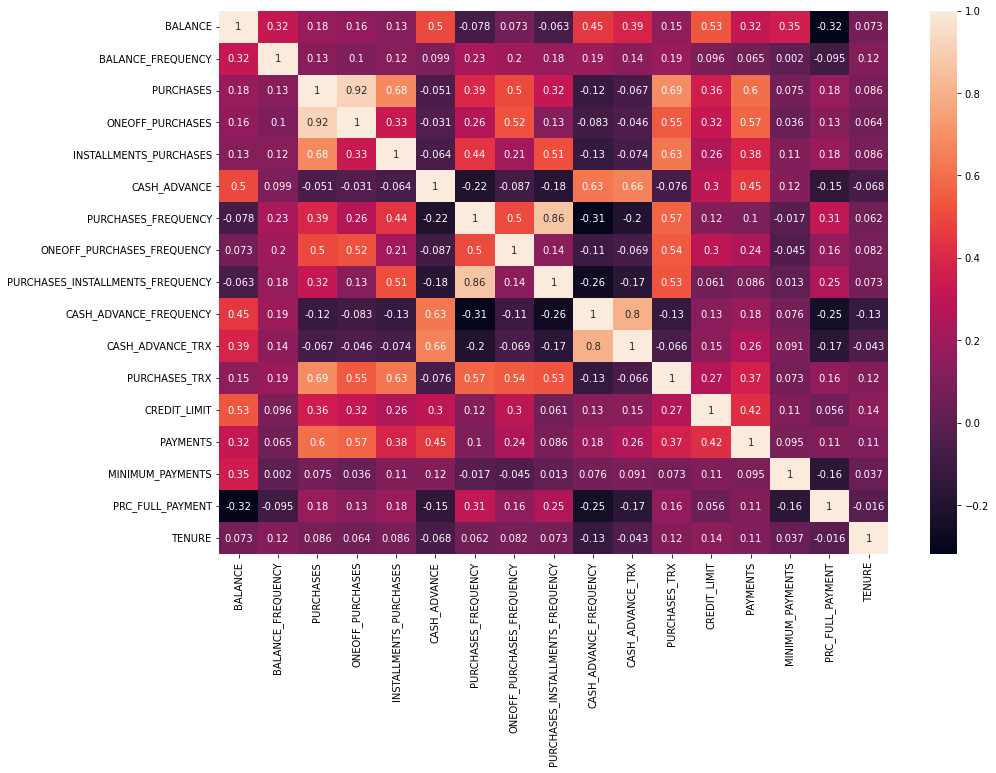

In [13]:
#Memvisualisasikan korelasi data dalam heatmap
df_corr=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, annot=True)

# Save Plot
plt.savefig("corr_chart.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

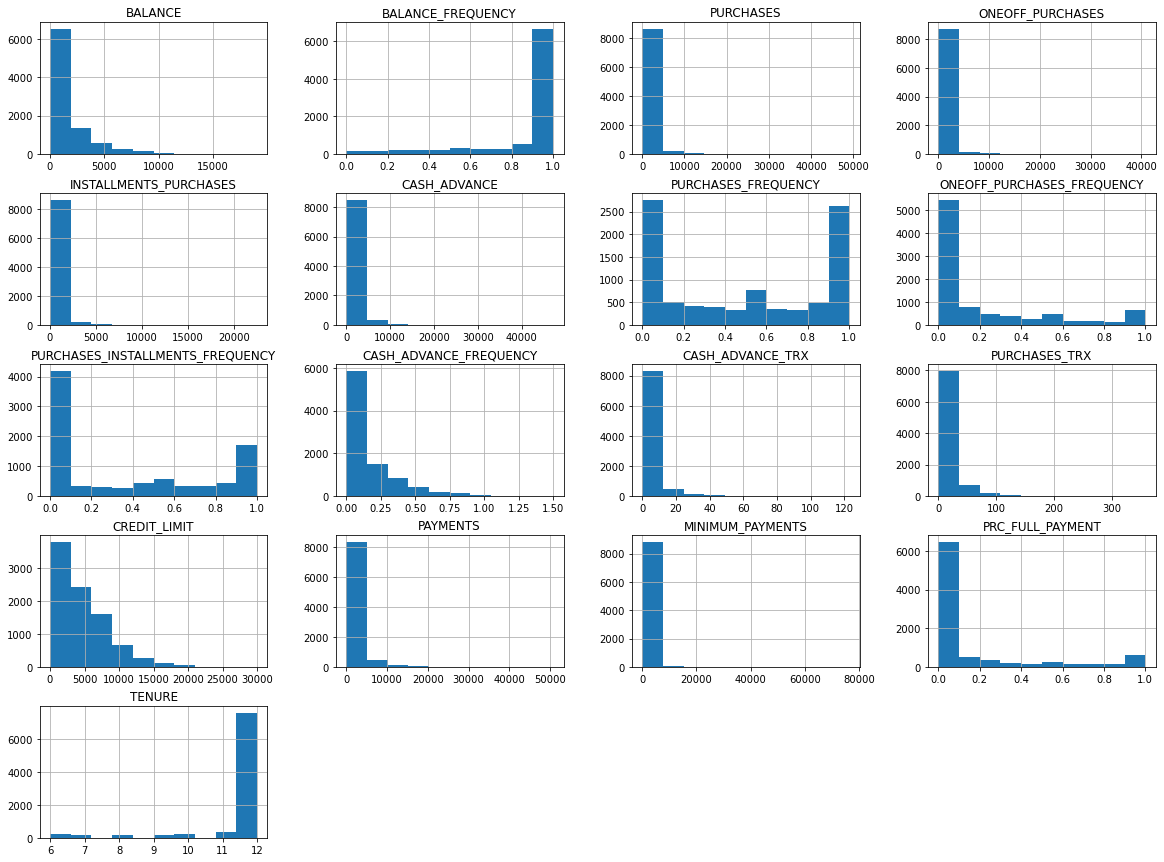

In [14]:
#Membuat histogram pada setiap kolom
df.hist(figsize=(20,15));

# Save Plot
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

# Data Preprocessing

In [15]:
#Menghapus kolom CUST_ID
df.drop(columns=["CUST_ID"], inplace=True)

#Melihat 5 data teratas
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,4494.449450,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
# Membagi dataset
df_uji = df.head(500)
df_latih = df.tail(8450)

### Scaling Data

In [17]:
a = [i for i in df.columns]
scaler = StandardScaler()
df_latih[a] = scaler.fit_transform(df_latih[a])
df_latih = df_latih.reset_index()
df_latih.head()

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,500,-0.154296,0.520973,0.223467,-0.164878,0.840831,-0.444264,1.066130,-0.110276,1.391462,-0.259626,-0.327712,0.184672,-0.557998,-0.370299,-0.208546,-0.529710,0.366261
1,501,5.936806,0.520973,19.059954,24.352636,0.029847,-0.468546,0.858379,1.578893,0.132540,-0.675924,-0.472953,5.819775,3.545439,12.123447,6.188739,-0.246079,0.366261
2,502,-0.709806,0.520973,-0.118861,0.091111,-0.454160,-0.468546,0.235134,1.297362,-0.916563,-0.675924,-0.472953,-0.142001,4.388610,-0.306742,-0.312261,2.590246,0.366261
3,503,-0.332894,0.520973,0.424596,0.144527,0.743278,-0.468546,1.273878,0.555152,1.372387,-0.675924,-0.472953,0.633846,-0.108306,-0.244560,-0.281744,-0.529710,-0.370797
4,504,-0.685940,-0.243449,-0.377760,-0.351147,-0.246475,-0.468546,0.858379,-0.673333,1.181640,-0.675924,-0.472953,-0.182835,0.172751,-0.106159,-0.320490,0.491366,0.366261


# Modeling

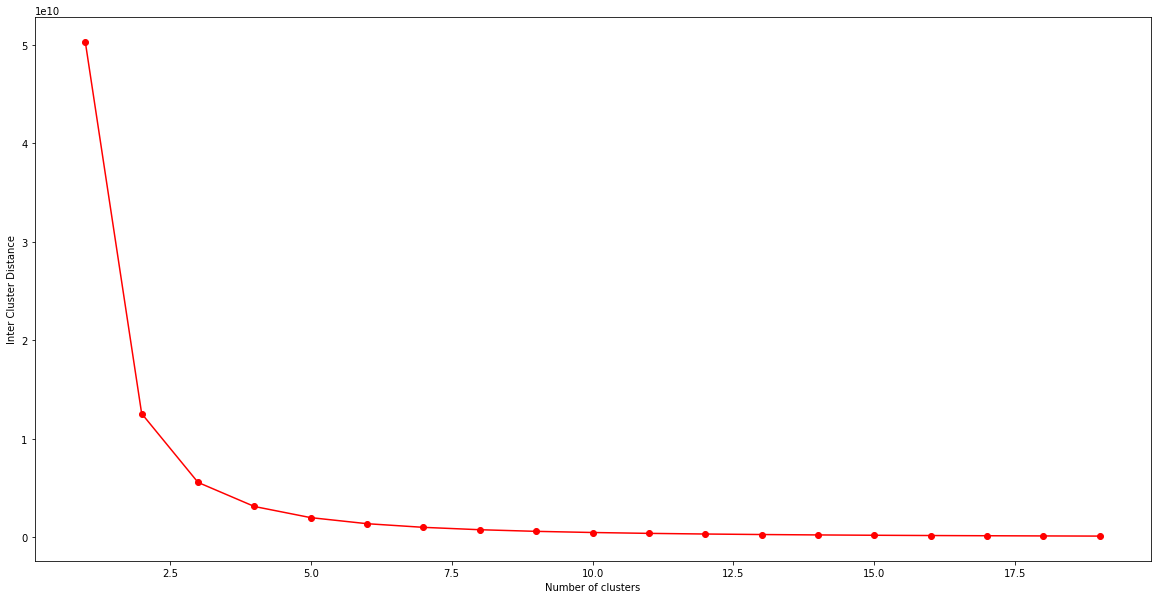

<Figure size 432x288 with 0 Axes>

In [18]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=40)
    km.fit(df_latih)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(20,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

# Save Plot
plt.savefig("kmeans_graph_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [19]:
km = KMeans(n_clusters = 3,init ='k-means++', max_iter=300,random_state=35)
model1=km.fit(df_latih)
y_pred = km.predict(df_latih)

In [20]:
clus_df = pd.DataFrame(df_latih,columns = df_latih.columns)
clus_df['CLUSTERS'] = y_pred
clus_df.head(10)

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,500,-0.154296,0.520973,0.223467,-0.164878,0.840831,-0.444264,1.066130,-0.110276,1.391462,-0.259626,-0.327712,0.184672,-0.557998,-0.370299,-0.208546,-0.529710,0.366261,1
1,501,5.936806,0.520973,19.059954,24.352636,0.029847,-0.468546,0.858379,1.578893,0.132540,-0.675924,-0.472953,5.819775,3.545439,12.123447,6.188739,-0.246079,0.366261,1
2,502,-0.709806,0.520973,-0.118861,0.091111,-0.454160,-0.468546,0.235134,1.297362,-0.916563,-0.675924,-0.472953,-0.142001,4.388610,-0.306742,-0.312261,2.590246,0.366261,1
3,503,-0.332894,0.520973,0.424596,0.144527,0.743278,-0.468546,1.273878,0.555152,1.372387,-0.675924,-0.472953,0.633846,-0.108306,-0.244560,-0.281744,-0.529710,-0.370797,1
4,504,-0.685940,-0.243449,-0.377760,-0.351147,-0.246475,-0.468546,0.858379,-0.673333,1.181640,-0.675924,-0.472953,-0.182835,0.172751,-0.106159,-0.320490,0.491366,0.366261,1
5,505,-0.725891,-0.625660,-0.284375,-0.351147,-0.023578,-0.468546,0.235134,-0.673333,0.552179,-0.675924,-0.472953,-0.305337,-0.529892,-0.370574,-0.332960,2.873877,0.366261,1
6,506,0.009034,0.520973,-0.048625,-0.351147,0.539125,-0.468546,0.858379,-0.673333,0.971820,-0.675924,-0.472953,0.143837,-0.810949,-0.344370,0.224150,-0.529710,0.366261,1
7,507,0.561695,0.520973,12.092949,13.183732,4.251493,-0.468546,1.273878,2.705004,-0.077282,-0.675924,-0.472953,4.063909,3.404910,8.054280,-0.176770,2.873877,0.366261,1
8,508,0.701289,0.520973,-0.464772,-0.351147,-0.454160,-0.331820,-1.219106,-0.673333,-0.916563,0.156677,-0.037230,-0.591176,-0.389363,-0.357981,0.093872,-0.529710,0.366261,1
9,509,1.748991,0.520973,0.368600,0.600030,-0.240742,0.053147,1.273878,2.423477,0.552179,0.572975,0.108011,1.573030,1.662355,-0.071614,0.243562,-0.529710,0.366261,1


In [21]:
clus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8450 entries, 0 to 8449
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             8450 non-null   int64  
 1   BALANCE                           8450 non-null   float64
 2   BALANCE_FREQUENCY                 8450 non-null   float64
 3   PURCHASES                         8450 non-null   float64
 4   ONEOFF_PURCHASES                  8450 non-null   float64
 5   INSTALLMENTS_PURCHASES            8450 non-null   float64
 6   CASH_ADVANCE                      8450 non-null   float64
 7   PURCHASES_FREQUENCY               8450 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8450 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8450 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8450 non-null   float64
 11  CASH_ADVANCE_TRX                  8450 non-null   float64
 12  PURCHA

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(df_latih)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8450, 2)

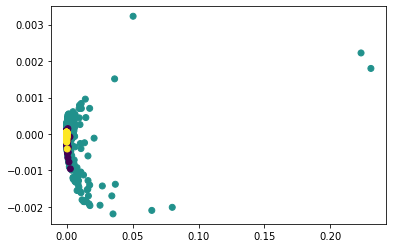

In [27]:
model = KMeans(n_clusters=3)
x, y = X_PCA[:, 0], X_PCA[:, 1]
plt.scatter(x, y, c = model.fit_predict(df_latih))
plt.show()

# Kesimpulan
1. Terdapat **missing value** di variabel **CREDIT_LIMIT (1 missing value)** dan **MINIMUM_PAYMENTS (313 missing value)**.
2. Saat menggunakan kartu kredit, sebagian besar customer kartu kredit lebih memilih masa berlaku (Tenure) **12 bulan** dibandingkan opsi masa berlaku (Tenure) lainnya.
3. Persentase saldo customer yang sering diperbarui **(frequently updated)** ada **69.39%** dan persentase saldo customer yang tidak sering diperbarui **(not frequently updated)** ada **30.60%**. Sehingga bisa disimpulkan sebagian besar customer sering memperbarui saldo kartu kreditnya.
4. Rata-rata customer tidak menggunakan kartu kredit untuk **pembayaran satu kali** (ONE_OFF_PURCHASES) atau **pembayaran dengan cicilan** (PURCHASES_INSTALLMENT_FREQUENCY).